In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Major1/Code

[Errno 2] No such file or directory: '/content/drive/MyDrive/Major1/Code'
/content


In [ ]:
!git clone https://github.com/ImagingYeditepe/Segmentation-of-Teeth-in-Panoramic-X-ray-Image.git

fatal: destination path 'Segmentation-of-Teeth-in-Panoramic-X-ray-Image' already exists and is not an empty directory.


In [ ]:
%cd /content/drive/MyDrive/Major1/Code/Segmentation-of-Teeth-in-Panoramic-X-ray-Image

[Errno 2] No such file or directory: '/content/drive/MyDrive/Major1/Code/Segmentation-of-Teeth-in-Panoramic-X-ray-Image'
/content


In [ ]:
from download_dataset import *
import os
path = "/content/Data"
if os.path.exists(path+'/DentalPanoramicXrays.zip') == False:
  os.mkdir(path)
  download_dataset(path+'/')

ModuleNotFoundError: ignored

In [ ]:
from images_prepare import *
#pre_images(resize_shape,path,include_zip)
X,X_sizes=pre_images((512,512),path,True)

In [ ]:
from masks_prepare import *
#Y=pre_masks(resize_shape=(512,512),path='/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image/Original_Masks')  ORIGINALL MASKS function 
Y=pre_splitted_masks(path='/content/drive/MyDrive/Major1/Code/Segmentation-of-Teeth-in-Panoramic-X-ray-Image/Custom_Masks') #Custom Splitted MASKS size 512x512

In [ ]:
X=np.float32(X/255)
Y=np.float32(Y/255)

In [ ]:
x_train=X[:105,:,:,:]
y_train=Y[:105,:,:,:]
x_test=X[105:,:,:,:]
y_test=Y[105:,:,:,:]

In [ ]:
import random
import matplotlib.pyplot as plt
random_number=random.randint(0,104)
print(random_number)

46


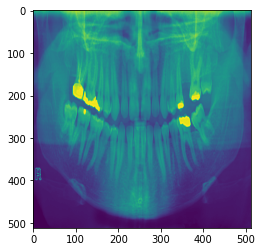

In [ ]:
#Checking data X  and Y matching
plt.imshow(x_train[random_number,:,:,0])

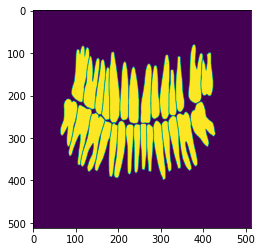

In [ ]:
#Checking data X  and Y matching
plt.imshow(y_train[random_number,:,:,0])

In [ ]:
from model import *
model=UNET(input_shape=(512,512,1),last_activation='sigmoid')
model.summary()

ModuleNotFoundError: ignored

In [ ]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Your choice batch and epoch 
model.fit(x_train,y_train,batch_size=8,epochs=100,verbose=1)

14/14 [==============================] - 32s 2s/step - loss: 0.0688 - accuracy: 0.9074
Epoch 52/100
 4/14 [=======>......................] - ETA: 24s - loss: 0.0706 - accuracy: 0.9036

KeyboardInterrupt: ignored

In [ ]:
predict_img=model.predict(x_test)
model.save(path)
predict=predict_img[1,:,:,0] 

INFO:tensorflow:Assets written to: /content/Data/assets


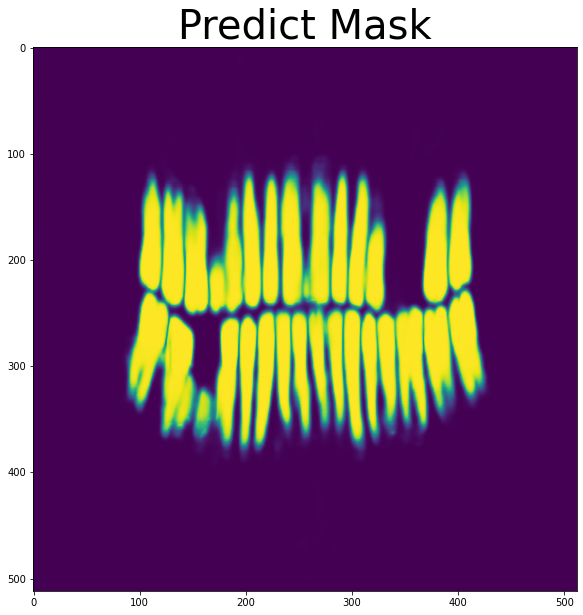

In [ ]:
plt.figure(figsize = (20,10))
plt.title("Predict Mask",fontsize = 40)
plt.imshow(predict)
#For CCA, we saved
plt.imsave("/content/predict.png",predict)

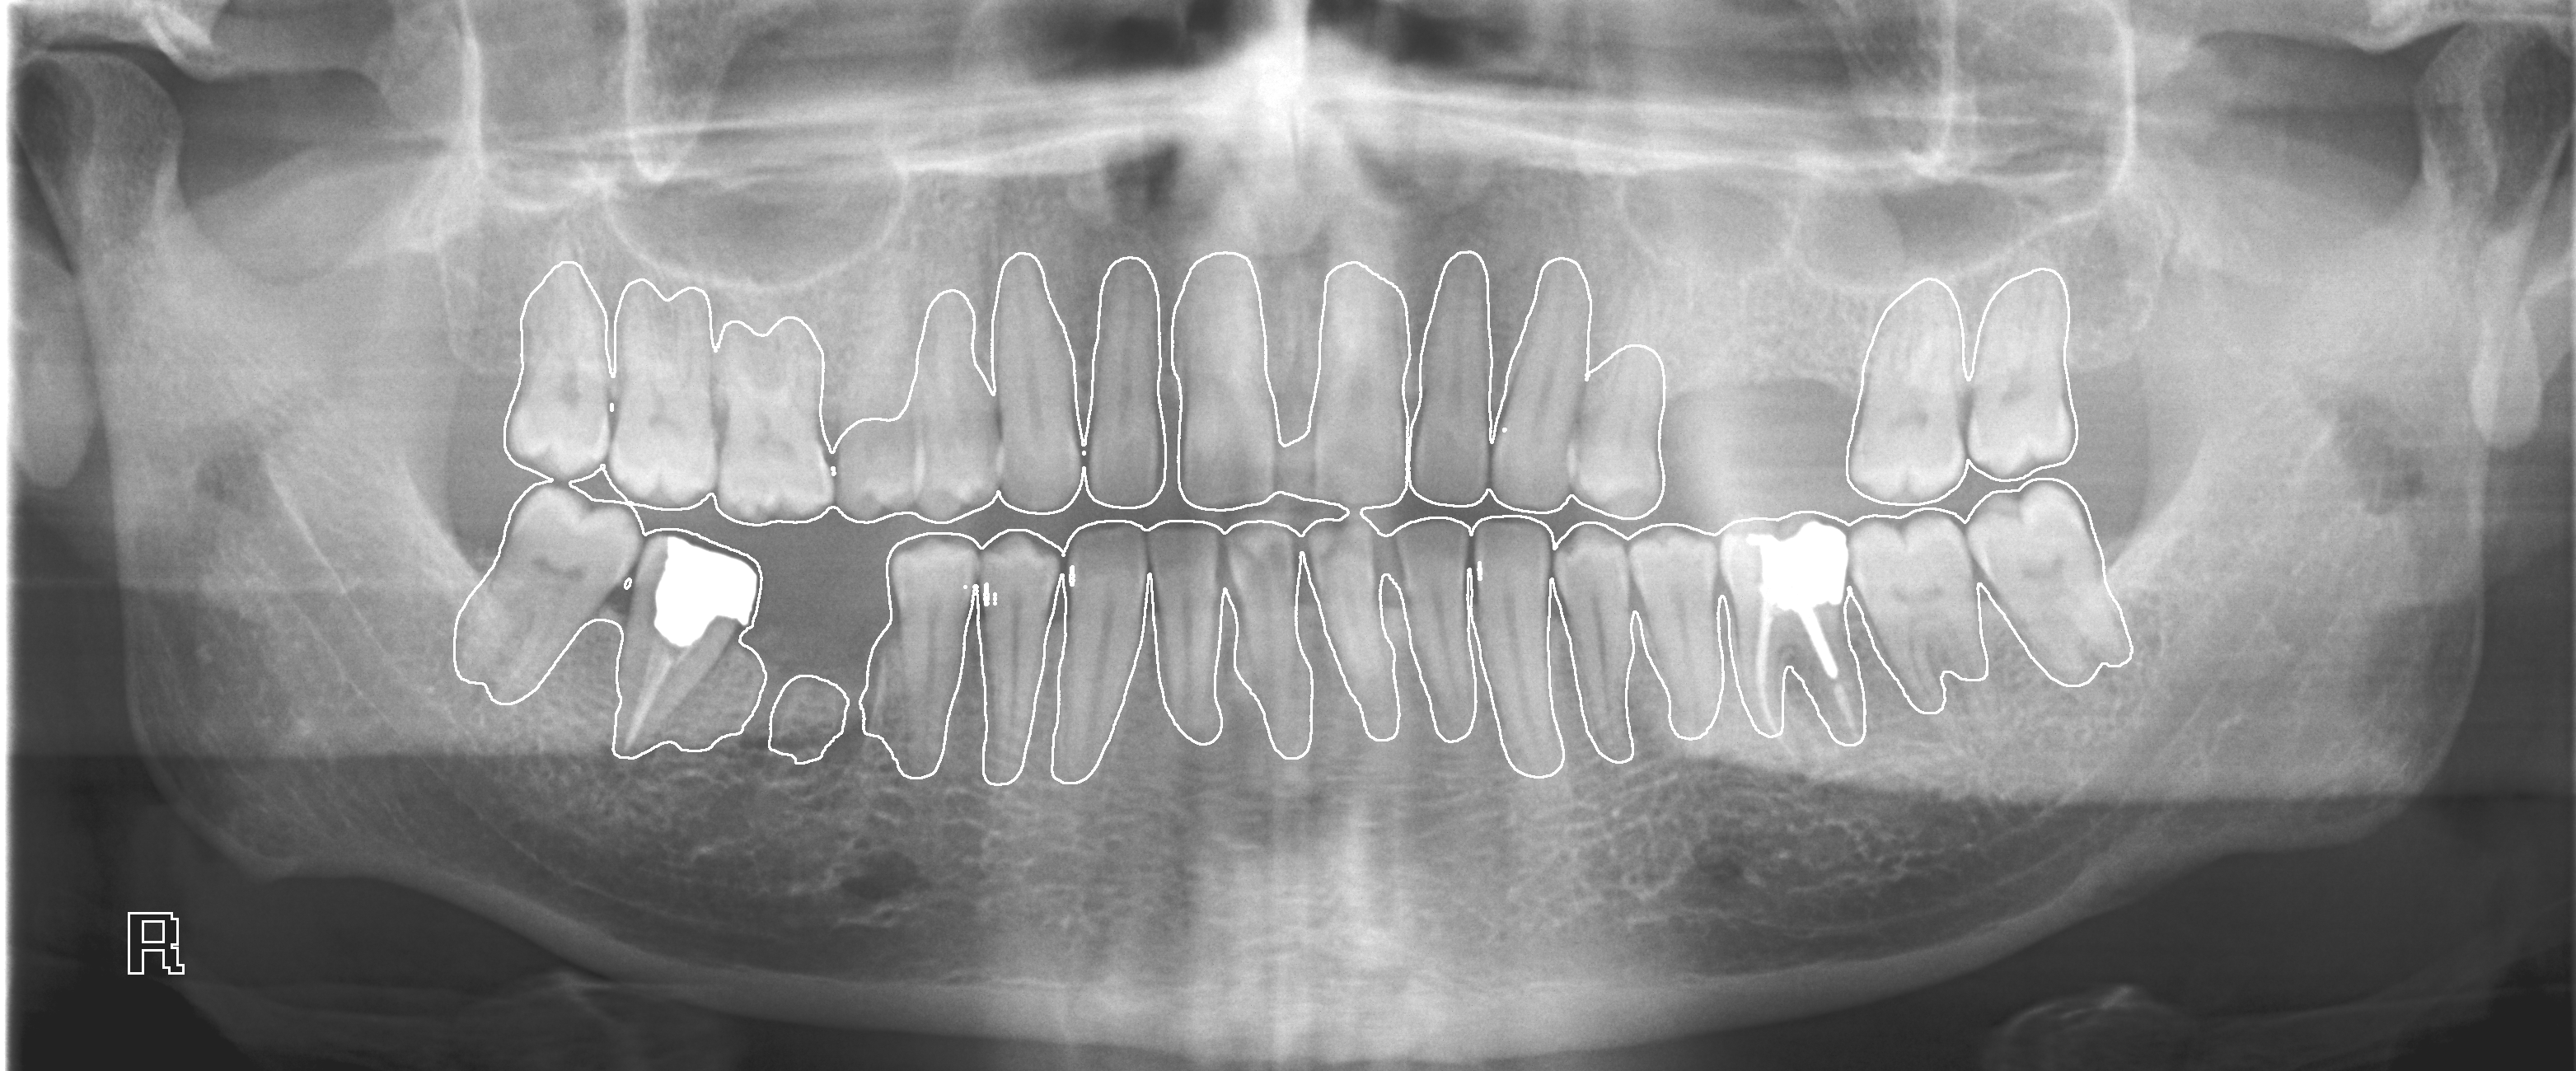

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from CCA_Analysis import *


##Plotting - RESULT Example
img=cv2.imread("/content/Data/Images/107.png")#original img 107.png 

predict1 = cv2.resize(predict, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

mask=np.uint8(predict1*255)# 
_, mask = cv2.threshold(mask, thresh=255/2, maxval=255, type=cv2.THRESH_BINARY)
cnts,hieararch=cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img[:,:,0], cnts, -1, (255, 0, 0) , 2)
img = cv2.UMat.get(img)
cv2_imshow(img)

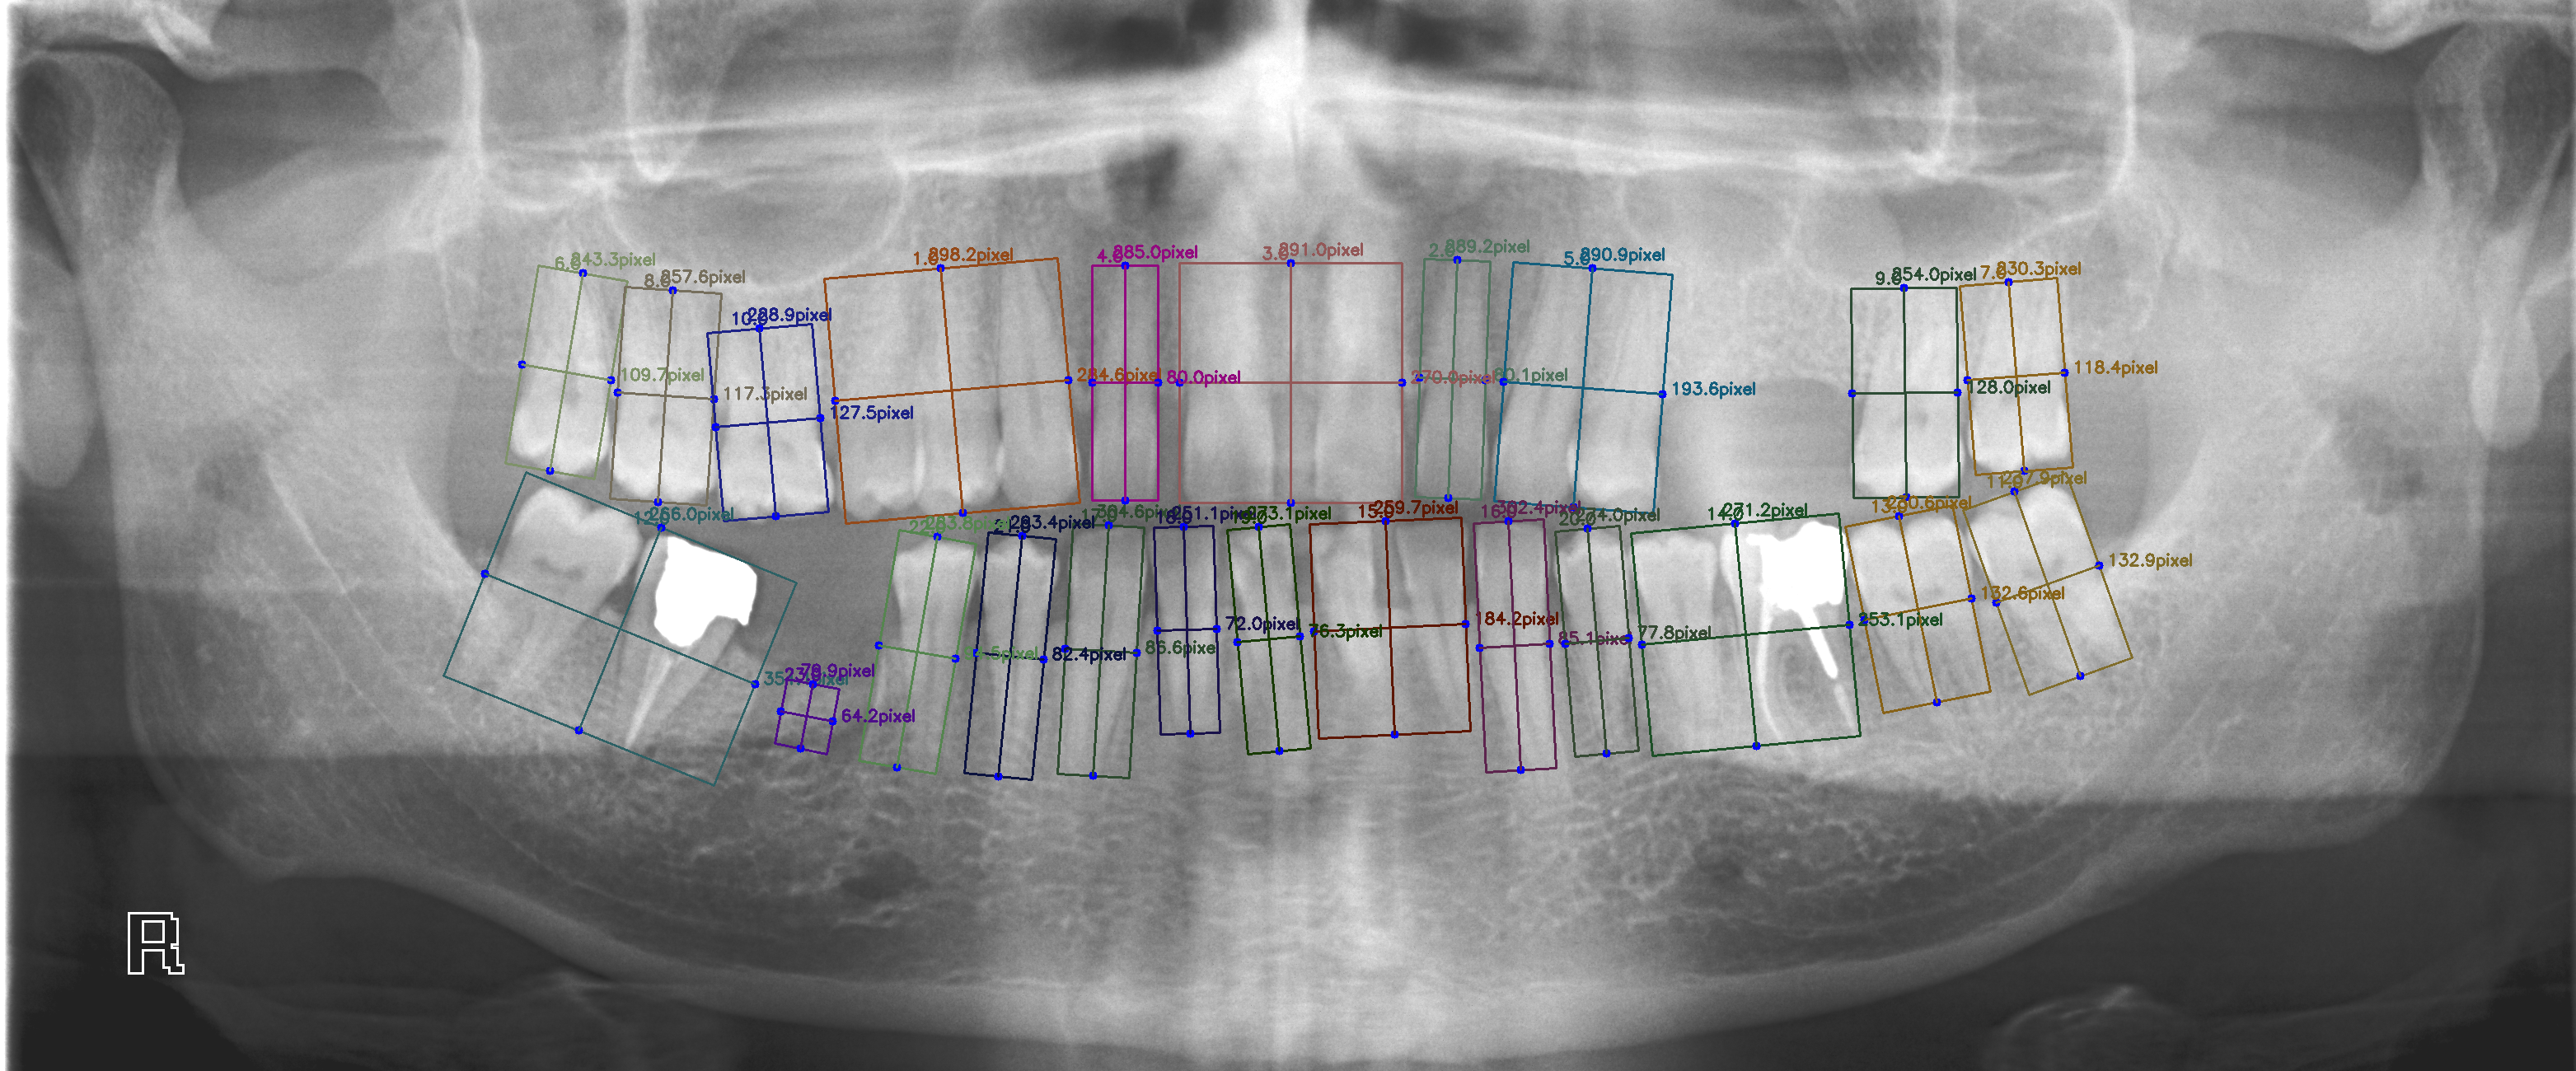

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from CCA_Analysis import *


##Plotting - RESULT Example with CCA_Analysis
img=cv2.imread("/content/Data/Images/107.png")#original img 107.png 

#load image (mask was saved by matplotlib.pyplot) 
predicted=cv2.imread("/content/predict.png")

predicted = cv2.resize(predicted, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

cca_result,teeth_count=CCA_Analysis(img,predicted,3,2)
cv2_imshow(cca_result)

In [ ]:
print(teeth_count,"Teeth Count")

23 Teeth Count
